# **LOAD DATA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("diabetes (1).csv")
population = df.copy()
seed = 123
np.random.seed(seed)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **RANDOM SAMPLE OF 25 , COMPARE MEAN & MAX OF GLUCOSE**

In [3]:
sample = population.sample(n=25, random_state=seed)

pop_mean_glucose = population["Glucose"].mean()
pop_max_glucose = population["Glucose"].max()

sample_mean_glucose = sample["Glucose"].mean()
sample_max_glucose = sample["Glucose"].max()

print("Population Mean Glucose:", pop_mean_glucose)
print("Sample Mean Glucose:", sample_mean_glucose)
print("Population Max Glucose:", pop_max_glucose)
print("Sample Max Glucose:", sample_max_glucose)

Population Mean Glucose: 120.89453125
Sample Mean Glucose: 130.36
Population Max Glucose: 199
Sample Max Glucose: 197


# **CHARTS**

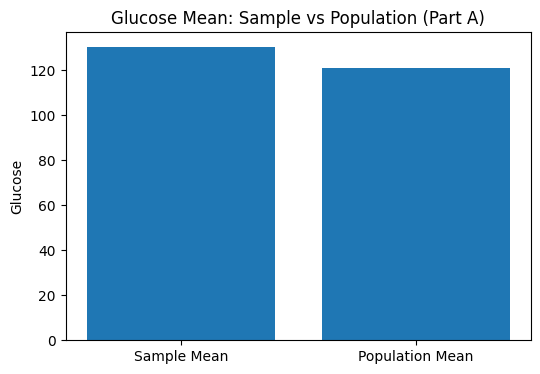

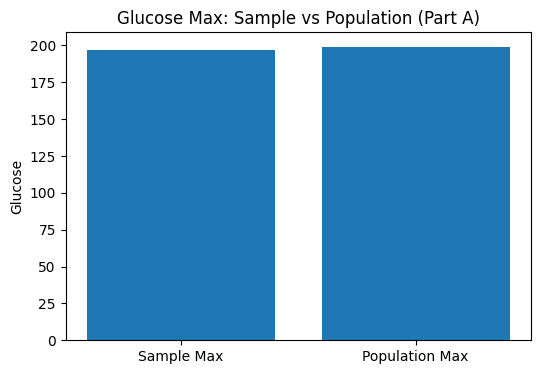

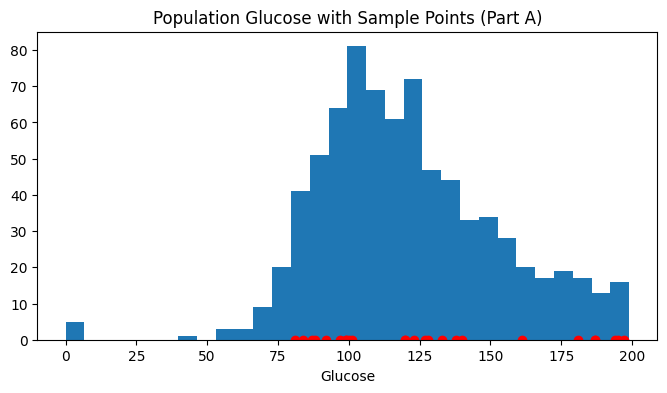

In [4]:
# Charts (A)
plt.figure(figsize=(6,4))
plt.bar(["Sample Mean","Population Mean"],
        [sample_mean_glucose, pop_mean_glucose])
plt.title("Glucose Mean: Sample vs Population (Part A)")
plt.ylabel("Glucose")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["Sample Max","Population Max"],
        [sample_max_glucose, pop_max_glucose])
plt.title("Glucose Max: Sample vs Population (Part A)")
plt.ylabel("Glucose")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(population["Glucose"], bins=30)
plt.scatter(sample["Glucose"], [0]*25, color='red')
plt.title("Population Glucose with Sample Points (Part A)")
plt.xlabel("Glucose")
plt.show()

# **PRECENTILE OF BMI ,SAMPLE VS POPU98THLATION**

In [5]:
pop_98_bmi = np.percentile(population["BMI"], 98)
sample_98_bmi = np.percentile(sample["BMI"], 98)

print("Population 98th Percentile BMI:", pop_98_bmi)
print("Sample 98th Percentile BMI:", sample_98_bmi)


Population 98th Percentile BMI: 47.52599999999996
Sample 98th Percentile BMI: 45.263999999999996


# **CHARTS**

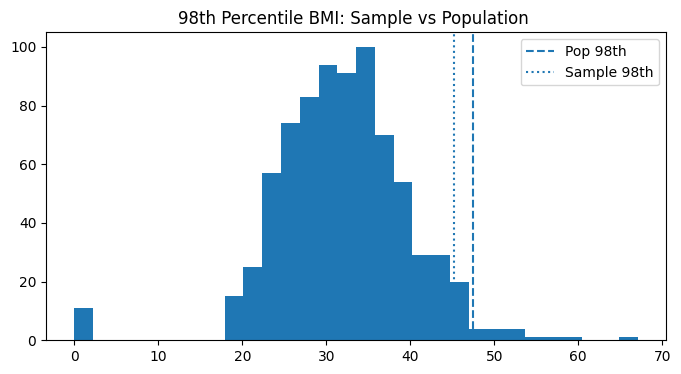

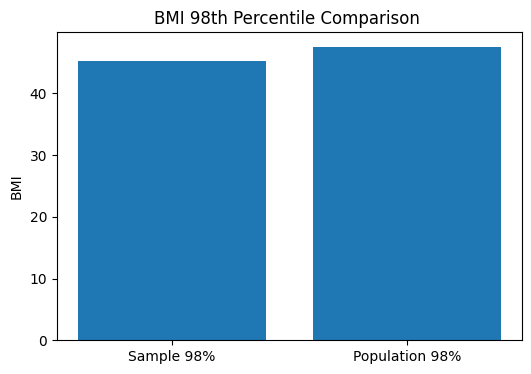

In [6]:
plt.figure(figsize=(8,4))
plt.hist(population["BMI"], bins=30)
plt.axvline(pop_98_bmi, linestyle='dashed', label="Pop 98th")
plt.axvline(sample_98_bmi, linestyle='dotted', label="Sample 98th")
plt.legend()
plt.title("98th Percentile BMI: Sample vs Population ")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["Sample 98%","Population 98%"], [sample_98_bmi, pop_98_bmi])
plt.title("BMI 98th Percentile Comparison ")
plt.ylabel("BMI")
plt.show()


# **BOOTSTRAP:500 SAMPLES OF SIZE 150 FOR BLOODPRESSURE**

In [7]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_98 = []

for i in range(500):
    bs = population.sample(n=150, replace=True)
    bootstrap_means.append(bs["BloodPressure"].mean())
    bootstrap_stds.append(bs["BloodPressure"].std())
    bootstrap_98.append(np.percentile(bs["BloodPressure"], 98))


pop_mean_bp = population["BloodPressure"].mean()
pop_std_bp = population["BloodPressure"].std()
pop_98_bp = np.percentile(population["BloodPressure"], 98)

print("Population Mean BP:", pop_mean_bp)
print("Bootstrap Mean of Means:", np.mean(bootstrap_means))
print("\nPopulation SD BP:", pop_std_bp)
print("Bootstrap Mean of SDs:", np.mean(bootstrap_stds))
print("\nPopulation 98th Percentile BP:", pop_98_bp)
print("Bootstrap Mean of 98th Percentiles:", np.mean(bootstrap_98))


Population Mean BP: 69.10546875
Bootstrap Mean of Means: 69.15222666666666

Population SD BP: 19.355807170644777
Bootstrap Mean of SDs: 19.192792750902836

Population 98th Percentile BP: 99.31999999999994
Bootstrap Mean of 98th Percentiles: 98.03292000000003


# **CHARTS**

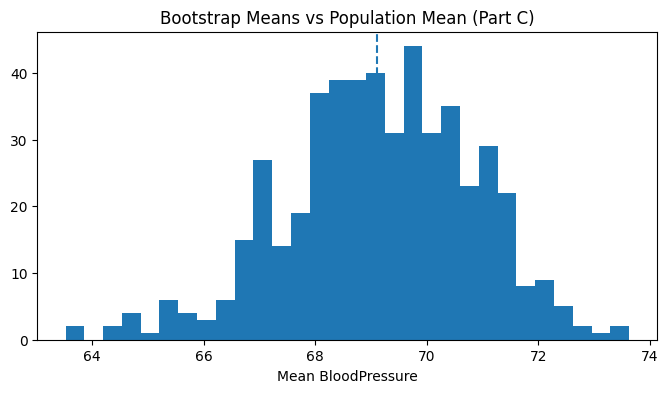

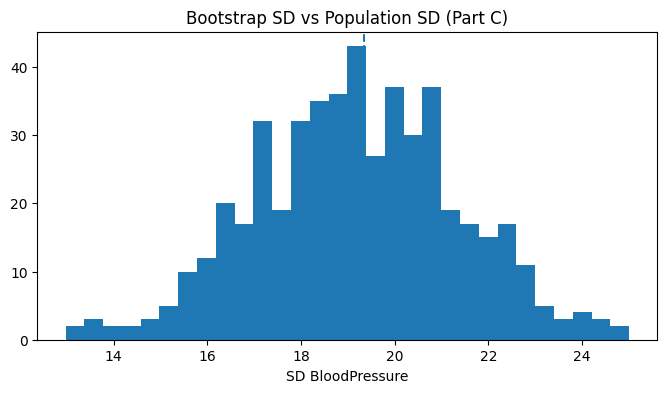

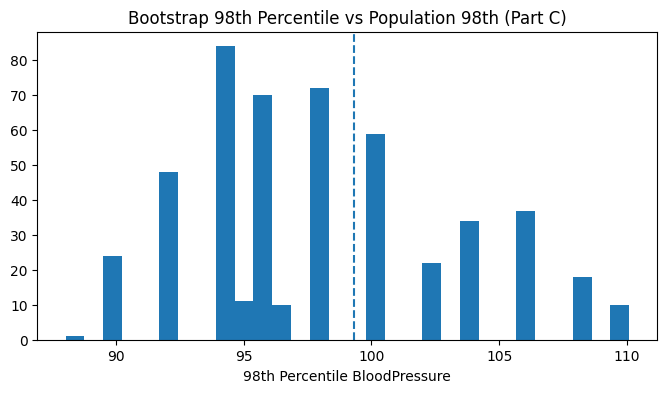

In [8]:
plt.figure(figsize=(8,4))
plt.hist(bootstrap_means, bins=30)
plt.axvline(pop_mean_bp, linestyle='dashed')
plt.title("Bootstrap Means vs Population Mean (Part C)")
plt.xlabel("Mean BloodPressure")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(bootstrap_stds, bins=30)
plt.axvline(pop_std_bp, linestyle='dashed')
plt.title("Bootstrap SD vs Population SD (Part C)")
plt.xlabel("SD BloodPressure")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(bootstrap_98, bins=30)
plt.axvline(pop_98_bp, linestyle='dashed')
plt.title("Bootstrap 98th Percentile vs Population 98th (Part C)")
plt.xlabel("98th Percentile BloodPressure")
plt.show()

In [9]:
final_results = pd.DataFrame({
    "Statistic": [
        "Population Mean", "Sample Mean", "Population Max", "Sample Max",
        "Population 98th Percentile BMI", "Sample 98th Percentile BMI",
        "Population Mean BP", "Bootstrap Mean of Means",
        "Population SD BP", "Bootstrap Mean of SDs",
        "Population 98th Percentile BP", "Bootstrap 98th Percentile"
    ],
    "Value": [
        pop_mean_glucose, sample_mean_glucose, pop_max_glucose, sample_max_glucose,
        pop_98_bmi, sample_98_bmi,
        pop_mean_bp, np.mean(bootstrap_means),
        pop_std_bp, np.mean(bootstrap_stds),
        pop_98_bp, np.mean(bootstrap_98)
    ]
})

# Display the combined results table
print("Final Results Summary:")
display(final_results)

Final Results Summary:


,Statistic,Value
0,Population Mean,120.894531
1,Sample Mean,130.360000
2,Population Max,199.000000
3,Sample Max,197.000000
4,Population 98th Percentile BMI,47.526000
5,Sample 98th Percentile BMI,45.264000
6,Population Mean BP,69.105469
7,Bootstrap Mean of Means,69.152227
8,Population SD BP,19.355807
9,Bootstrap Mean of SDs,19.192793
